# Projeto de Banco de Dados
  * Curso: Bacharelado Interdisciplinar em Ciência e Tecnologia
  * Professor: MSC. Cláudio Aroucha
  * Equipe: Rafael Araújo, Carlos Renan, Rodrigo Lima, Pedro Gustavo




#  Contexto do Banco de Dados: Laboratório de Exames Clínicos
O banco de dados laboratorio_exames foi desenvolvido com o objetivo de gerenciar de forma eficiente e segura todas as informações operacionais de um laboratório de exames clínicos. Ele abrange desde o cadastro de pacientes e profissionais de saúde até o controle de agendamentos, exames realizados, pagamentos e convênios médicos.

##  Finalidade

O sistema visa automatizar os processos diários do laboratório, permitindo:

* Organização de agendamentos de exames;

* Registro dos resultados dos exames;

* Histórico de alterações de resultados (com rastreabilidade);

* Controle de pagamentos e convênios;

* Acompanhamento da atuação dos profissionais de saúde;

* Visualização clara e confiável dos dados via consultas, relatórios e views.



##  Principais Atores Envolvidos

* Pacientes: pessoas que realizam exames clínicos.

* Profissionais de saúde: médicos que atendem os pacientes e interpretam os exames.

* Atendentes: usuários administrativos que realizam o cadastro e o agendamento.

* Administradores: gerenciam o sistema e têm acesso completo.

* Convênios: operadoras de saúde conveniadas com o laboratório.

##  Funcionalidades representadas no modelo

* Cadastro de pacientes com vínculo ao convênio (se houver) e seus respectivos endereços.

* Cadastro de profissionais da área da saúde (com CRM e especialidade).

* Agendamento de exames, associando paciente, profissional e data/hora.

* Relação entre agendamentos e exames realizados, com status e resultado.

* Histórico de alterações nos resultados, garantindo auditoria e rastreabilidade.

* Controle de pagamentos, permitindo múltiplas formas (cartão, pix, convênio, etc.).

* Sistema de usuários, com perfis diferenciados de acesso (admin, atendente, profissional).





# Diagrama EER 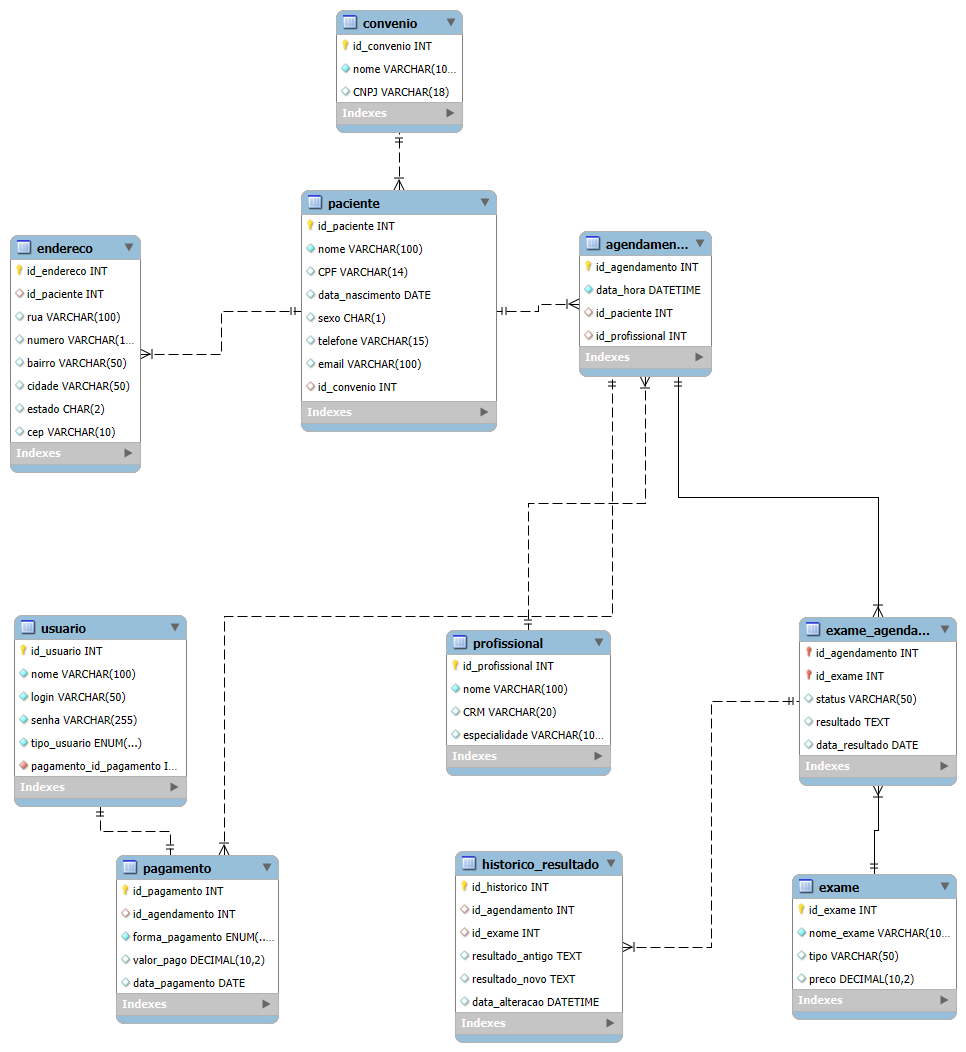

# Modelo de Entidade e Relacionamento (MER)
## Resumo textual do MER com suas entidades e relacionamentos principais:

## Entidades:
* Paciente (id, nome, data de nascimento, CPF, telefone, email)

* Endereço (id, paciente_id, rua, número, cidade, estado, CEP)

* Convênio (id, nome, CNPJ)

* Profissional de Saúde (id, nome, CRM, especialidade)

* Usuário (id, nome, login, senha, tipo: admin, atendente, profissional)

* Exame (id, nome, descrição)

* Agendamento (id, paciente_id, profissional_id, atendente_id, data/hora, status)

* Agendamento_Exame (id, agendamento_id, exame_id, status, resultado)

* Histórico de Resultados (id, agendamento_exame_id, resultado_anterior, resultado_novo, data_alteracao)

* Pagamento (id, agendamento_id, forma, valor, status, data)

## Relacionamentos:
* Paciente pode estar vinculado a um convênio.

* Paciente realiza um ou mais agendamentos.

* Profissional está presente no agendamento.

* Atendente cadastra o agendamento.

* Cada agendamento possui um ou mais exames.

* Cada agendamento pode ter um pagamento.

* Cada exame pode ter histórico de alterações.

# Mapeamento do MER para o Modelo Relacional



```
 PACIENTE
Campo,Tipo,Observações
id_paciente,INT (PK),Identificador único
nome,VARCHAR,Nome completo
data_nascimento,DATE,
cpf,VARCHAR(11),Único
telefone,VARCHAR,
email,VARCHAR,
id_convenio,INT (FK),Chave estrangeira para CONVENIO
,,
 CONVENIO
Campo,Tipo,Observações
id_convenio,INT (PK),Identificador
nome,VARCHAR,Nome da operadora
cnpj,VARCHAR(14),Único
,,
 ENDERECO
Campo,Tipo,Observações
id_endereco,INT (PK),
id_paciente,INT (FK),Relacionado ao paciente
"rua, numero, bairro, cidade, estado, cep",VARCHAR,
,,
 PROFISSIONAL
Campo,Tipo,Observações
id_profissional,INT (PK),
nome,VARCHAR,
crm,VARCHAR,
especialidade,VARCHAR,
,,
 USUARIO
Campo,Tipo,Observações
id_usuario,INT (PK),
nome,VARCHAR,
login,VARCHAR,
senha,VARCHAR,Criptografada
tipo,"ENUM('admin', 'atendente', 'profissional')",Perfil de acesso
,,
 EXAME
Campo,Tipo,Observações
id_exame,INT (PK),
nome,VARCHAR,
descricao,TEXT,
,,
 AGENDAMENTO
Campo,Tipo,Observações
id_agendamento,INT (PK),
id_paciente,INT (FK),
id_profissional,INT (FK),
id_usuario,INT (FK),Atendente que agendou
data_hora,DATETIME,Data e hora do agendamento
status,"ENUM('pendente', 'realizado', 'cancelado')",
,,
 AGENDAMENTO_EXAME (tabela associativa)
Campo,Tipo,Observações
id_agendamento_exame,INT (PK),
id_agendamento,INT (FK),
id_exame,INT (FK),
resultado,TEXT,Resultado do exame
status_resultado,"ENUM('pendente', 'pronto')",
,,
 HISTORICO_RESULTADO
Campo,Tipo,Observações
id_historico,INT (PK),
id_agendamento_exame,INT (FK),
resultado_anterior,TEXT,
resultado_novo,TEXT,
data_alteracao,DATETIME,
,,
 PAGAMENTO
Campo,Tipo,Observações
id_pagamento,INT (PK),
id_agendamento,INT (FK),
valor,DECIMAL,
forma_pagamento,"ENUM('pix', 'cartao', 'dinheiro', 'convênio')",
status,"ENUM('pago', 'pendente', 'cancelado')",
data_pagamento,DATETIME,
```


# Normalização até a 3ª Forma Normal (3FN)
 1ª Forma Normal (1FN)
Regra: Sem grupos repetitivos ou atributos multivalorados.
✅ Todas as tabelas estão em 1FN — cada campo armazena apenas um valor por registro.

 2ª Forma Normal (2FN)
Regra: Está na 1FN e todos os atributos não-chave dependem da chave primária completa (para tabelas com chave composta).
✅ Tabelas com chave composta (como AGENDAMENTO_EXAME) têm todos os atributos dependentes da chave completa.

 3ª Forma Normal (3FN)
Regra: Está na 2FN e nenhum atributo não-chave depende de outro atributo não-chave.
✅ Exemplo:

Na tabela PACIENTE, o atributo nome_convenio não foi incluído. Ao invés disso, temos a tabela CONVENIO, e o relacionamento é feito por id_convenio.

Portanto, não há dependências transitivas.

# Modelo Relacional Final (Normalizado até 3FN)
## Modelo abaixo como o resultado final:

* PACIENTE (id_paciente, nome, data_nascimento, cpf, telefone, email, id_convenio)

* ENDERECO (id_endereco, id_paciente, rua, numero, complemento, bairro, cidade, estado, cep)

* CONVENIO (id_convenio, nome, cnpj)

* PROFISSIONAL (id_profissional, nome, crm, especialidade)

* USUARIO (id_usuario, nome, login, senha, tipo)

* EXAME (id_exame, nome, descricao)

* AGENDAMENTO (id_agendamento, id_paciente, id_profissional, id_usuario, data_hora, status)

* AGENDAMENTO_EXAME (id_agendamento_exame, id_agendamento, id_exame, resultado, status_resultado)

* HISTORICO_RESULTADO (id_historico, id_agendamento_exame, resultado_anterior, resultado_novo, data_alteracao)

* PAGAMENTO (id_pagamento, id_agendamento, valor, forma_pagamento, status, data_pagamento)

# Script para criação no banco de dados e suas tabelas


In [ ]:
-- Criação do banco de dados
CREATE DATABASE laboratorio_exames;
USE laboratorio_exames;

-- Tabela: Convenio
CREATE TABLE Convenio (
    id_convenio INT AUTO_INCREMENT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    CNPJ VARCHAR(18) UNIQUE
);

-- Tabela: Paciente
CREATE TABLE Paciente (
    id_paciente INT AUTO_INCREMENT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    CPF VARCHAR(14) UNIQUE,
    data_nascimento DATE,
    sexo CHAR(1),
    telefone VARCHAR(15),
    email VARCHAR(100),
    id_convenio INT,
    FOREIGN KEY (id_convenio) REFERENCES Convenio(id_convenio)
);

-- Tabela: Endereço do Paciente
CREATE TABLE Endereco (
    id_endereco INT AUTO_INCREMENT PRIMARY KEY,
    id_paciente INT,
    rua VARCHAR(100),
    numero VARCHAR(10),
    bairro VARCHAR(50),
    cidade VARCHAR(50),
    estado CHAR(2),
    cep VARCHAR(10),
    FOREIGN KEY (id_paciente) REFERENCES Paciente(id_paciente)
);

-- Tabela: Profissional
CREATE TABLE Profissional (
    id_profissional INT AUTO_INCREMENT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    CRM VARCHAR(20) UNIQUE,
    especialidade VARCHAR(100)
);

-- Tabela: Usuário do Sistema
CREATE TABLE Usuario (
    id_usuario INT AUTO_INCREMENT PRIMARY KEY,
    nome VARCHAR(100) NOT NULL,
    login VARCHAR(50) UNIQUE NOT NULL,
    senha VARCHAR(255) NOT NULL,
    tipo_usuario ENUM('admin', 'atendente', 'profissional') NOT NULL
);

-- Tabela: Exame
CREATE TABLE Exame (
    id_exame INT AUTO_INCREMENT PRIMARY KEY,
    nome_exame VARCHAR(100) NOT NULL,
    tipo VARCHAR(50),
    preco DECIMAL(10,2)
);

-- Tabela: Agendamento
CREATE TABLE Agendamento (
    id_agendamento INT AUTO_INCREMENT PRIMARY KEY,
    data_hora DATETIME NOT NULL,
    id_paciente INT,
    id_profissional INT,
    FOREIGN KEY (id_paciente) REFERENCES Paciente(id_paciente),
    FOREIGN KEY (id_profissional) REFERENCES Profissional(id_profissional)
);

-- Tabela: Exame Agendado (Exames dentro de cada agendamento)
CREATE TABLE Exame_Agendado (
    id_agendamento INT,
    id_exame INT,
    status VARCHAR(50),
    resultado TEXT,
    data_resultado DATE,
    PRIMARY KEY (id_agendamento, id_exame),
    FOREIGN KEY (id_agendamento) REFERENCES Agendamento(id_agendamento),
    FOREIGN KEY (id_exame) REFERENCES Exame(id_exame)
);

-- Tabela: Pagamento
CREATE TABLE Pagamento (
    id_pagamento INT AUTO_INCREMENT PRIMARY KEY,
    id_agendamento INT,
    forma_pagamento ENUM('convênio', 'dinheiro', 'cartão', 'pix') NOT NULL,
    valor_pago DECIMAL(10,2),
    data_pagamento DATE,
    FOREIGN KEY (id_agendamento) REFERENCES Agendamento(id_agendamento)
);

-- Tabela: Histórico de Alterações de Resultados
CREATE TABLE Historico_Resultado (
    id_historico INT AUTO_INCREMENT PRIMARY KEY,
    id_agendamento INT,
    id_exame INT,
    resultado_antigo TEXT,
    resultado_novo TEXT,
    data_alteracao DATETIME,
    FOREIGN KEY (id_agendamento, id_exame) REFERENCES Exame_Agendado(id_agendamento, id_exame)
);


# Script para inserção no banco de dados



In [ ]:
-- Inserir Convênios
INSERT INTO Convenio (nome, CNPJ) VALUES
('Unimed', '12.345.678/0001-99'),
('Bradesco Saúde', '98.765.432/0001-10'),
('Amil', '55.555.555/0001-55');

-- Inserir Pacientes
INSERT INTO Paciente (nome, CPF, data_nascimento, sexo, telefone, email, id_convenio) VALUES
('Rafael Araújo', '123.456.789-00', '1985-04-12', 'M', '11999990001', 'rafael.araujo@gmail.com', 1),
('Renan Andrade', '987.654.321-11', '1990-08-30', 'M', '11988880002', 'renan.andrade@hotmail.com', 2),
('Rodrigo', '111.222.333-44', '1978-12-05', 'M', '11977770003', 'rodrigo@yahoo.com', NULL);

-- Inserir Endereços
INSERT INTO Endereco (id_paciente, rua, numero, bairro, cidade, estado, cep) VALUES
(1, 'Rua das Flores', '123', 'Jardim Primavera', 'São Luís', 'MA', '01001-000'),
(2, 'Av. Brasil', '456', 'Centro', 'São José de Ribamar', 'MA', '20010-000'),
(3, 'Rua das Acácias', '789', 'Vila Nova', 'Araçagi', 'MA', '80010-000');

-- Inserir Profissionais
INSERT INTO Profissional (nome, CRM, especialidade) VALUES
('Dr. Claudio Aroucha', 'CRM12345', 'Clínico Geral'),
('Dra. Fernanda Lima', 'CRM67890', 'Cardiologista');

-- Inserir Usuários do Sistema
INSERT INTO Usuario (nome, login, senha, tipo_usuario) VALUES
('Admin', 'admin', 'admin123', 'admin'),
('Recepcionista', 'recep', 'recep123', 'atendente'),
('Dr. Carlos', 'carlos', 'carlos123', 'profissional');

-- Inserir Exames
INSERT INTO Exame (nome_exame, tipo, preco) VALUES
('Hemograma Completo', 'Sangue', 50.00),
('Colesterol Total', 'Sangue', 40.00),
('ECG', 'Cardiologia', 150.00);

-- Inserir Agendamentos
INSERT INTO Agendamento (data_hora, id_paciente, id_profissional) VALUES
('2025-08-01 09:00:00', 1, 1),
('2025-08-01 10:30:00', 2, 2);

-- Inserir Exames Agendados
INSERT INTO Exame_Agendado (id_agendamento, id_exame, status, resultado, data_resultado) VALUES
(1, 1, 'Realizado', 'Hemácias: Normal; Leucócitos: Normal', '2025-08-02'),
(1, 2, 'Realizado', 'Colesterol: 190 mg/dL', '2025-08-02'),
(2, 3, 'Pendente', NULL, NULL);

-- Inserir Pagamentos
INSERT INTO Pagamento (id_agendamento, forma_pagamento, valor_pago, data_pagamento) VALUES
(1, 'convênio', 90.00, '2025-08-01'),
(2, 'dinheiro', 150.00, '2025-08-01');

-- Inserir Histórico de Resultados (exemplo de alteração)
INSERT INTO Historico_Resultado (id_agendamento, id_exame, resultado_antigo, resultado_novo, data_alteracao) VALUES
(1, 1, 'Hemácias: Normal; Leucócitos: Normal', 'Hemácias: Leve anemia; Leucócitos: Normal', '2025-08-03');

